In [41]:
%%capture
%pip install seaborn

In [42]:
import re
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("dark")

class Chain():
    def __init__(self, length, words) -> None:
        self.length = length
        self.words = words
        self.size = len(words)

In [43]:
chains = []
with open("longest.txt") as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        if line.startswith("Longest"):
            length = int(re.search(r"\d+", line)[0])
            chain = Chain(length, lines[idx+2].strip().split(" -> "))
            chains.append(chain)

In [44]:
df = pd.DataFrame([{"length": chain.length, "words": chain.words, "size": chain.size} for chain in chains])

Text(24.625000000000007, 0.5, 'Number of words')

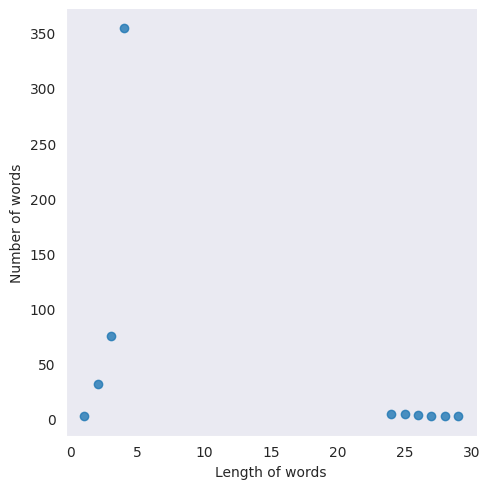

In [45]:
sns.lmplot(x="length", y="size", data=df, fit_reg=False)
plt.xlabel("Length of words")
plt.ylabel("Number of words")